In [1]:
from pyspark import SparkContext
sc = SparkContext(appName="StormApp").getOrCreate()


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/12/02 20:15:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
rdd = sc.textFile("/Users/courtneymohun/Downloads/storm_data.csv", minPartitions=None)


In [3]:
header = rdd.first()
rdd = rdd.filter(lambda x: x != header)
rdd = rdd.map(lambda x: (x.split(",")))


In [4]:
header=header.split(",")


In [5]:
directinjuries=header.index("INJURIES_DIRECT")
indirectinjuries=header.index("INJURIES_INDIRECT")
directdeaths=header.index("DEATHS_DIRECT")
indirectdeaths=header.index("DEATHS_INDIRECT")
propertydamage=header.index("DAMAGE_PROPERTY")
cropdamage=header.index("DAMAGE_CROPS")
mycolumns = [directinjuries, indirectinjuries, directdeaths, indirectdeaths, propertydamage, cropdamage]

for column in mycolumns:
    print(f"x[{column}] != '' AND")


x[21] != '' AND
x[22] != '' AND
x[23] != '' AND
x[24] != '' AND
x[25] != '' AND
x[26] != '' AND


In [6]:
rdd_filter = rdd.filter(lambda x: x[26] != '' and x[22] != '' and x[23] != '' and x[24] != '' and x[25] != '' and x[27] != '' and x[25] != 'K' and (x[13] == "Flood" or x[13] == "Flash Flood"))
rdd_filter = rdd_filter.map(lambda x: (x[13],  x[25]))



In [7]:
rdd_filter = rdd_filter.map(lambda x: (x[0],  float(x[1][:-1])*1000 if x[1][-1] == 'K' else float(x[1][:-1])*1000000 if x[1][-1] == 'M' else float(x[1][:-1])*1000000000 if x[1][-1] == 'B' else float(x[1])))
rdd_filter.collect()

[('Flash Flood', 5000000.0),
 ('Flash Flood', 3000.0),
 ('Flood', 75000.0),
 ('Flood', 2000.0),
 ('Flood', 0.0),
 ('Flood', 5000.0),
 ('Flood', 1000.0),
 ('Flash Flood', 25000.0),
 ('Flash Flood', 50000.0),
 ('Flash Flood', 2500000.0),
 ('Flood', 10000.0),
 ('Flash Flood', 15000.0),
 ('Flood', 50000.0),
 ('Flood', 0.0),
 ('Flood', 0.0),
 ('Flash Flood', 2500000.0),
 ('Flash Flood', 2500000.0),
 ('Flood', 3000000.0),
 ('Flood', 70000.0),
 ('Flood', 70000.0),
 ('Flood', 15000.0),
 ('Flash Flood', 1000000.0),
 ('Flash Flood', 2500000.0),
 ('Flash Flood', 100000.0),
 ('Flash Flood', 0.0),
 ('Flood', 20000.0),
 ('Flood', 10000.0),
 ('Flood', 8000000.0),
 ('Flood', 5000000.0),
 ('Flood', 50000000.0),
 ('Flash Flood', 3000000.0),
 ('Flash Flood', 20000.0),
 ('Flood', 0.0),
 ('Flash Flood', 1000000.0),
 ('Flash Flood', 10000000.0),
 ('Flash Flood', 5000000.0),
 ('Flash Flood', 65000.0),
 ('Flood', 100000.0),
 ('Flash Flood', 30000.0),
 ('Flash Flood', 50000000.0),
 ('Flash Flood', 50000.0),
 (

In [8]:
from statistics import mean
rdd_property_damage = rdd_filter.reduceByKey(lambda a, b: mean([float(a), float(b)]))
property_damage=rdd_property_damage.collect()



In [9]:
rdd_filter = rdd.filter(lambda x: x[26] != '' and x[22] != '' and x[23] != '' and x[24] != '' and x[25] != '' and x[27] != '' and x[26] != 'K' and (x[13] == "Flood" or x[13] == "Flash Flood"))
rdd_filter = rdd_filter.map(lambda x: (x[13],  x[26]))

rdd_filter.collect()



[('Flash Flood', '200K'),
 ('Flash Flood', '5K'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flash Flood', '50K'),
 ('Flash Flood', '10K'),
 ('Flash Flood', '15M'),
 ('Flood', '0'),
 ('Flash Flood', '10K'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flash Flood', '15K'),
 ('Flash Flood', '18K'),
 ('Flood', '50K'),
 ('Flood', '10K'),
 ('Flood', '10K'),
 ('Flood', '.5K'),
 ('Flash Flood', '10K'),
 ('Flash Flood', '5K'),
 ('Flash Flood', '0'),
 ('Flash Flood', '3K'),
 ('Flood', '5K'),
 ('Flood', '2K'),
 ('Flood', '50K'),
 ('Flood', '80K'),
 ('Flood', '50K'),
 ('Flash Flood', '500K'),
 ('Flash Flood', '20K'),
 ('Flood', '0'),
 ('Flash Flood', '978K'),
 ('Flash Flood', '10M'),
 ('Flash Flood', '10M'),
 ('Flash Flood', '10K'),
 ('Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood', '50K'),
 ('Flash Flood', '1M'),
 ('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flood', '4K'),
 ('Flood', '0'),
 ('Flash Flood', '15

In [10]:
rdd_filter = rdd_filter.filter(lambda x: x[1] != 'M')
rdd_filter.collect()

[('Flash Flood', '200K'),
 ('Flash Flood', '5K'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flash Flood', '50K'),
 ('Flash Flood', '10K'),
 ('Flash Flood', '15M'),
 ('Flood', '0'),
 ('Flash Flood', '10K'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flash Flood', '15K'),
 ('Flash Flood', '18K'),
 ('Flood', '50K'),
 ('Flood', '10K'),
 ('Flood', '10K'),
 ('Flood', '.5K'),
 ('Flash Flood', '10K'),
 ('Flash Flood', '5K'),
 ('Flash Flood', '0'),
 ('Flash Flood', '3K'),
 ('Flood', '5K'),
 ('Flood', '2K'),
 ('Flood', '50K'),
 ('Flood', '80K'),
 ('Flood', '50K'),
 ('Flash Flood', '500K'),
 ('Flash Flood', '20K'),
 ('Flood', '0'),
 ('Flash Flood', '978K'),
 ('Flash Flood', '10M'),
 ('Flash Flood', '10M'),
 ('Flash Flood', '10K'),
 ('Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood', '50K'),
 ('Flash Flood', '1M'),
 ('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flood', '4K'),
 ('Flood', '0'),
 ('Flash Flood', '15

In [11]:
rdd_filter = rdd_filter.map(lambda x: (x[0],  float(x[1][:-1])*1000 if x[1][-1] == 'K' else float(x[1][:-1])*1000000 if x[1][-1] == 'M' else float(x[1][:-1])*1000000000 if x[1][-1] == 'B' else float(x[1])))

rdd_crop_damage = rdd_filter.reduceByKey(lambda a, b: mean([float(a), float(b)]))
crop_damage=rdd_crop_damage.collect()



In [12]:
rdd_filter = rdd.filter(lambda x: x[26] != '' and x[22] != '' and x[23] != '' and x[24] != '' and x[25] != '' and x[27] != '' and x[21] != 'K' and x[21] != 'M' and x[21] != 'B' and (x[13] == "Flood" or x[13] == "Flash Flood"))
rdd_filter = rdd_filter.map(lambda x: (x[13],  x[21]))


rdd_filter.collect()


[('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flood', '0'),
 ('Flash Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flood', '50'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flood', '100'),
 ('Flood', '250'),
 ('Flood', '150'),
 ('Flash Flood', '300'),
 ('Flash Flood', '0'),
 ('Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood', '800'),
 ('Flash Flood', '50'),
 ('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flood', '0'),
 ('Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood', '0'),
 ('Flash Flood',

In [13]:
rdd_filter = rdd_filter.map(lambda x: (x[0],  float(x[1][:-1])*1000 if x[1][-1] == 'K' else float(x[1][:-1])*1000000 if x[1][-1] == 'M' else float(x[1][:-1])*1000000000 if x[1][-1] == 'B' else float(x[1])))

rdd_filter.collect()





[('Flash Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flood', 0.0),
 ('Flood', 0.0),
 ('Flood', 0.0),
 ('Flood', 0.0),
 ('Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flood', 0.0),
 ('Flood', 0.0),
 ('Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flood', 50.0),
 ('Flood', 0.0),
 ('Flood', 0.0),
 ('Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flood', 0.0),
 ('Flood', 0.0),
 ('Flood', 100.0),
 ('Flood', 250.0),
 ('Flood', 150.0),
 ('Flash Flood', 300.0),
 ('Flash Flood', 0.0),
 ('Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flash Flood', 800.0),
 ('Flash Flood', 50.0),
 ('Flash Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flood', 0.0),
 ('Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flash Flood', 0.0),
 ('Flash Flood',

In [14]:
rdd_direct_injuries = rdd_filter.reduceByKey(lambda a, b: mean([float(a), float(b)]))
direct_injuries=rdd_direct_injuries.collect()


In [15]:
rdd_filter = rdd.filter(lambda x: x[26] != '' and x[22] != '' and x[23] != '' and x[24] != '' and x[25] != '' and x[27] != '' and x[22] != 'K' and x[22] != 'M' and x[22] != 'B' and (x[13] == "Flood" or x[13] == "Flash Flood"))
rdd_filter = rdd_filter.map(lambda x: (x[13],  x[22]))

rdd_filter = rdd_filter.map(lambda x: (x[0],  float(x[1][:-1])*1000 if x[1][-1] == 'K' else float(x[1][:-1])*1000000 if x[1][-1] == 'M' else float(x[1][:-1])*1000000000 if x[1][-1] == 'B' else float(x[1])))

rdd_indirect_injuries = rdd_filter.reduceByKey(lambda a, b: mean([float(a), float(b)]))
indirect_injuries=rdd_indirect_injuries.collect()




In [16]:
rdd_filter = rdd.filter(lambda x: x[26] != '' and x[22] != '' and x[23] != '' and x[24] != '' and x[25] != '' and x[27] != '' and x[23] != 'K' and x[23] != 'M' and x[23] != 'B' and (x[13] == "Flood" or x[13] == "Flash Flood"))
rdd_filter = rdd_filter.map(lambda x: (x[13],  x[23]))

rdd_filter = rdd_filter.map(lambda x: (x[0],  float(x[1][:-1])*1000 if x[1][-1] == 'K' else float(x[1][:-1])*1000000 if x[1][-1] == 'M' else float(x[1][:-1])*1000000000 if x[1][-1] == 'B' else float(x[1])))

rdd_direct_deaths = rdd_filter.reduceByKey(lambda a, b: mean([float(a), float(b)]))
direct_deaths=rdd_direct_deaths.collect()





In [17]:
rdd_filter = rdd.filter(lambda x: x[26] != '' and x[22] != '' and x[23] != '' and x[24] != '' and x[25] != '' and x[27] != '' and x[24] != 'K' and x[24] != 'M' and x[24] != 'B' and (x[13] == "Flood" or x[13] == "Flash Flood"))
rdd_filter = rdd_filter.map(lambda x: (x[13],  x[24]))

rdd_filter = rdd_filter.map(lambda x: (x[0],  float(x[1][:-1])*1000 if x[1][-1] == 'K' else float(x[1][:-1])*1000000 if x[1][-1] == 'M' else float(x[1][:-1])*1000000000 if x[1][-1] == 'B' else float(x[1])))
rdd_indirect_deaths2=rdd_filter.map(lambda x: x[1])

rdd_indirect_deaths = rdd_filter.reduceByKey(lambda a, b: mean([float(a), float(b)]))
indirect_deaths=rdd_indirect_deaths.collect()




In [60]:
damage_type = [property_damage, crop_damage, direct_injuries, indirect_injuries, direct_deaths, indirect_deaths]
flood_damage = []
print(damage_type)
flash_flood_damage=[]
for i in damage_type:
    flood_damage.append(round(i[0][1]/i[1][1],2))
    flash_flood_damage.append(round(i[1][1]/i[1][1],2))
damages={"Flood Damages": flood_damage, "Flash Flood Damages": flash_flood_damage}
damages



[[('Flood', 17545.419479985485), ('Flash Flood', 8640.014321487708)], [('Flood', 0.9612360642395048), ('Flash Flood', 0.003029469939592513)], [('Flood', 3.815046511590927e-06), ('Flash Flood', 2.3841887890889313e-07)], [('Flood', 3.970466940254573e-23), ('Flash Flood', 1.6242265701293945e-05)], [('Flood', 0.000742204677117113), ('Flash Flood', 2.703184961621987e-07)], [('Flood', 1.4551915235196055e-11), ('Flash Flood', 6.938893903907228e-18)]]


{'Flood Damages': [2.03, 317.3, 16.0, 0.0, 2745.67, 2097152.0],
 'Flash Flood Damages': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

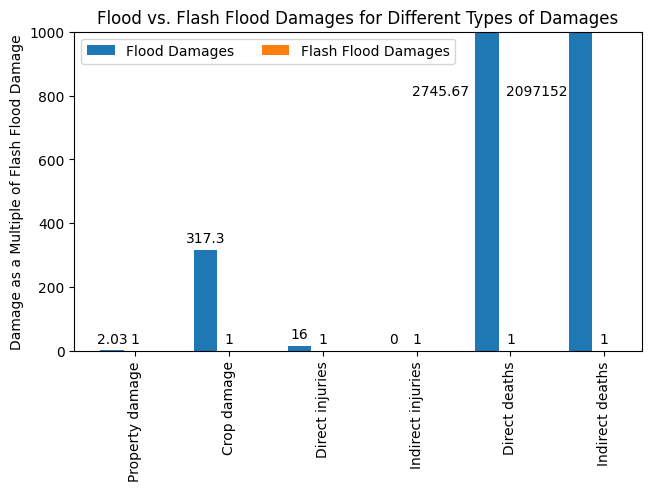

In [59]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(len(damage_type))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for i, j in damages.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, j, width, label=i)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Damage as a Multiple of Flash Flood Damage')
ax.set_title('Flood vs. Flash Flood Damages for Different Types of Damages')
ax.set_xticks(x + width, ["Property damage", "Crop damage", "Direct injuries", "Indirect injuries", "Direct deaths", "Indirect deaths"])
plt.xticks(rotation=90)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1000)
plt.text(3.2,800,"2745.67")
plt.text(4.2,800,"2097152")
plt.show()